# QuadPay: data_viz

#### Overview

Used this notebook to create charts in `src/viz.py`. Charts below are only for testing.

<br>


<br>

### Get data

In [5]:
import sys
sys.path.append('/home/jovyan/quadpay_analysis/src')


In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ORDERS_DATA = '../data/transformed_orders.csv'


In [99]:
# help(chartify)

orders = pd.read_csv(ORDERS_DATA)
orders = orders.drop(labels='Unnamed: 0', axis='columns')
orders.head()


,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,...,paid_installment_2_cum_avg.1,paid_installment_3_cum_avg.1,paid_installment_4_cum_avg.1,merchant_order_amount_cum_sum,merchant_orders_cum_sum,merchant_order_amount_cum_avg,merchant_paid_installment_1_ratio,merchant_paid_installment_2_ratio,merchant_paid_installment_3_ratio,merchant_paid_installment_4_ratio
0,E4BBCD,0005F1,8B9AB8,169.00,2018-08-30 22:39:26.397,2018-08-30 22:39:27.757,True,711,25,34266,...,1,1.0,1.0,169.00,1,169.00,1.0,1,1.0,1.0
1,E128F5,0005F1,8B9AB8,297.00,2018-09-27 13:58:34.243,2018-09-27 13:58:34.523,True,711,25,34266,...,1,1.0,1.0,297.00,1,297.00,1.0,1,1.0,1.0
2,A39F4B,0008C3,8D665E,109.00,2018-09-08 04:20:36.700,2018-09-08 04:20:37.950,True,588,35,89183,...,1,1.0,1.0,109.00,1,109.00,1.0,1,1.0,1.0
3,BFFC42,000A1F,944AC9,1036.78,2018-09-28 15:38:18.650,2018-09-28 15:38:18.947,True,624,21,16117,...,1,1.0,1.0,1036.78,1,1036.78,1.0,1,1.0,1.0
4,A91B2B,000B25,26ECA2,58.06,2018-09-11 02:20:55.423,2018-09-11 02:20:56.530,True,611,19,32817,...,1,1.0,1.0,58.06,1,58.06,1.0,1,1.0,1.0


In [97]:
# list(df)

<br>

### View scatterplots

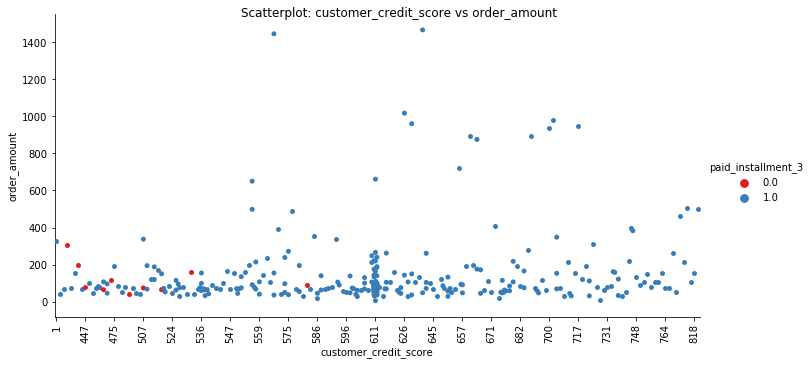

In [60]:

get_scatterplot(
    orders.sample(300), 
    x = "customer_credit_score",
    y = "order_amount",
    height = 5, width = 10,
    hue = "paid_installment_3",
)



<br>

### View histogram

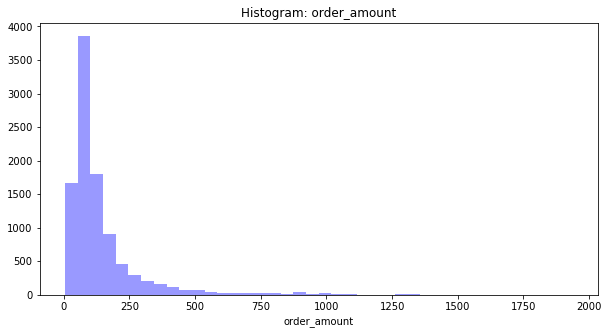

In [116]:

get_historgram(
    df=orders, x='order_amount', height=5, width=10, bins=40)


In [62]:
# help(sns.distplot)

<br>

### View bar chart

In [66]:
merchant_count = pd.DataFrame(df.groupby('merchant_id').size())
merchant_count = merchant_count.reset_index()
merchant_count.columns = ['merchant_id', 'orders']
merchant_count = merchant_count.sort_values(by='orders', ascending=False)
merchant_count.head()


,merchant_id,orders
82,C37828,1224
92,E3FFE5,934
46,6F498E,876
16,26ECA2,627
65,8D665E,565


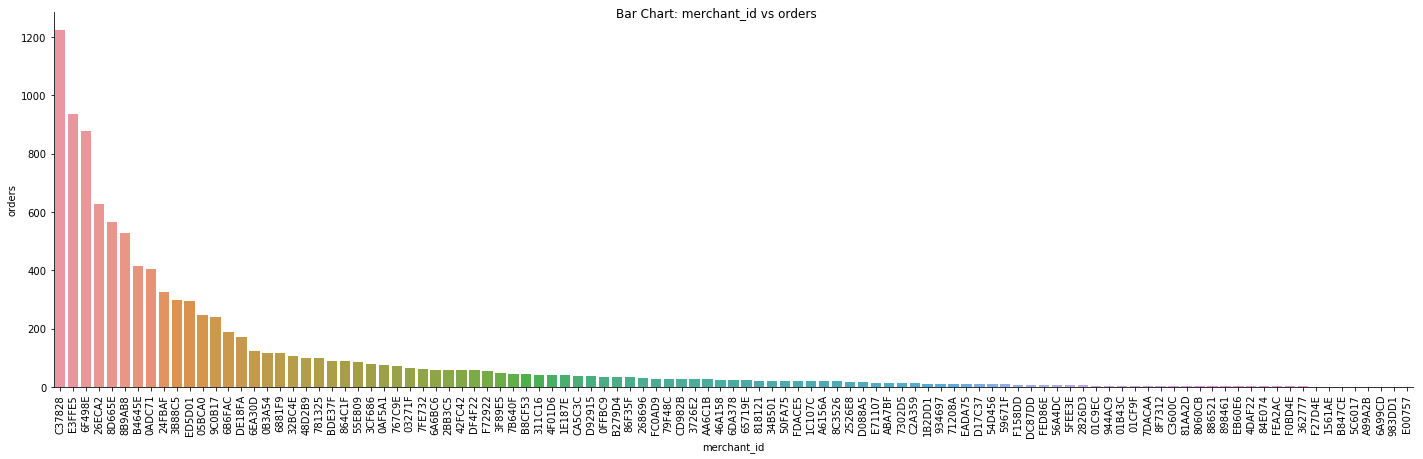

In [115]:

get_bar_chart(
    df = merchant_count,
    x = 'merchant_id', 
    y = 'orders',
    height = 6,
    width = 20,
)



<br>

### View boxplot

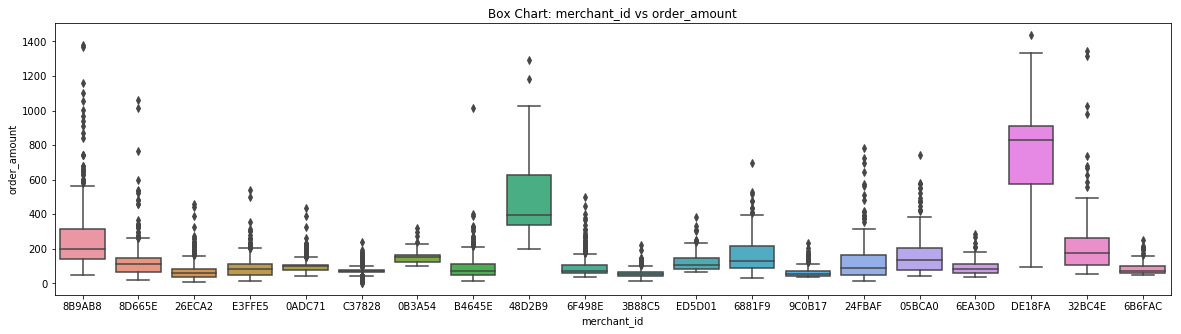

In [85]:
# boxplot of order amount for top 20 merchants
top_merchants = merchant_count.head(20)
top_merchants_orders = df[df['merchant_id'].isin(list(top_merchants.merchant_id))]

get_boxplot(
    df=top_merchants_orders, 
    x='merchant_id', 
    y='order_amount', 
    height=5, width=20
)

